<a href="https://colab.research.google.com/github/duonghiepit/logistic-regression/blob/main/3_LogReg_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/AIO2023/231006/code - update_1

/content/drive/MyDrive/AIO2023/231006/code - update_1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)

X = iris[:, :4]
y = iris[:, 4]

intercept = np.ones((X.shape[0], 1))
X = np.c_[intercept, X]

# shuffle
indices = np.random.permutation(X.shape[0])

X = X[indices]
y = y[indices]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [4]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):
    return (-y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

def predict(X, theta):
    return sigmoid_function(np.dot(X, theta))

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)).mean()

In [8]:
# training
lr = 0.01
num_iter = 100

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])
losses = []
accs = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)

    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)

    # update
    theta -= lr*gradient

    # ========================
    # loss
    losses.append(loss)

    # accuracy
    acc = (y_hat.round()==y).mean()
    accs.append(acc)

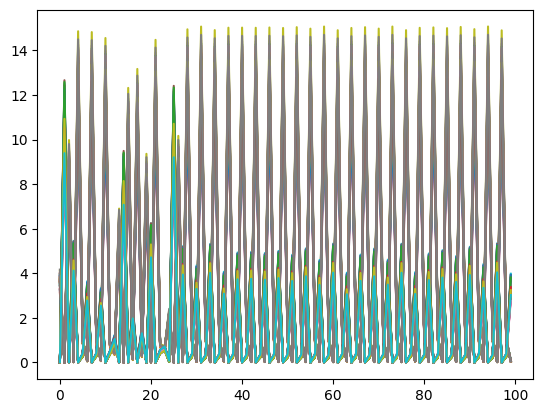

In [9]:
plt.plot(losses)
plt.show()

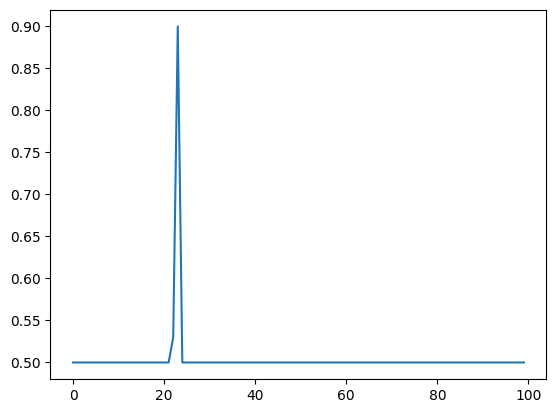

In [10]:
plt.plot(accs)
plt.show()